Buckling Composite Tool (Simple Supported Rectangular Composite Plate)

Author : Bruno Sales

In [205]:
import numpy as np
import sympy as sp
from scipy.linalg import inv
import matplotlib.pyplot as ply
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import quad
from scipy.linalg import eig

# Definindo variáveis simbólicas
x, y, z = sp.symbols('x y z')

# Definindo parâmetros de entrada
E_1 = 144600  # [N/mm^2]
E_2 = 27500   # [N/mm^2]
G_12 = 29000  # [N/mm^2]
v_12 = 0.31
v_21 = 0.31

# Definição das variáveis
a = 40 # [mm]  X axis
b = 80 # [mm]  Y axis

Fx = 0 # Corga por unidade de comprimento (Nx/a)
Fy = -1 # Corga por unidade de comprimento (Ny/b)

t = 0.184     # Espessura de cada lâmina, em [mm]

M = 3  # Ordem de iteração para o campo de deslocamento Nw

# Orientação das camadas do skin, em [°]
skin = [45, -45, 0, 90, 90, 0, -45, 45]

n = len(skin)  # Número de camadas - skin


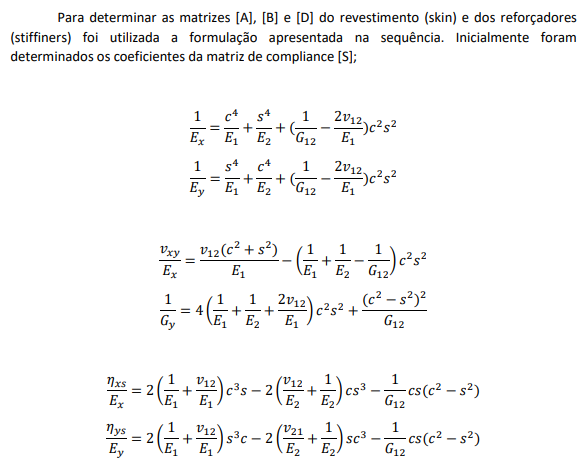

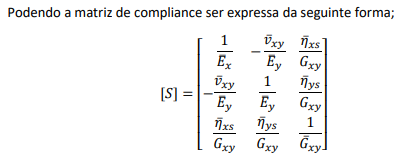

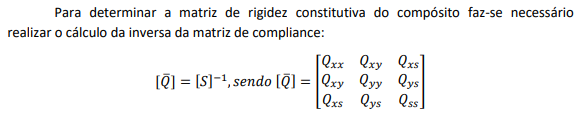

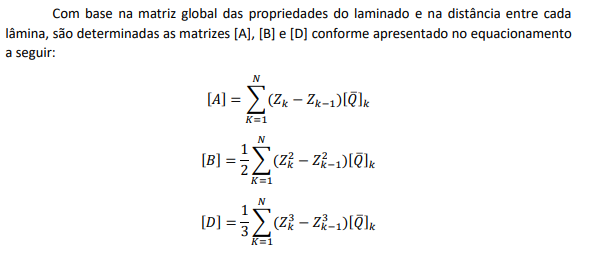

In [206]:
# Calculando a posição z de cada camada no skin 
Nz = []
for i in range(1, n+2):
    Nz.append((i - ((n/2) + 1)) * t)

# Diferenças entre espessuras no skin
d = []
dd = []
ddd = []
for j in range(1, n + 1):
    k = j - 1
    d.append(Nz[j] - Nz[k])
    dd.append(0.5 * (Nz[j]**2 - Nz[k]**2))
    ddd.append((1/3) * (Nz[j]**3 - Nz[k]**3))


# Matrizes A, B e D do skin
A = np.zeros((3, 3))
B = np.zeros((3, 3))
D = np.zeros((3, 3))

for i in range(n):
    theta_rad = np.radians(skin[i])  # Converte para radianos
    cos_theta = np.cos(theta_rad)
    sin_theta = np.sin(theta_rad)

    E_x = 1 / ((1 / E_1) * (cos_theta**4) + (1 / E_2) * (sin_theta**4) + ((1 / G_12) - (2 * v_12 / E_1)) * (cos_theta * sin_theta)**2)
    E_y = 1 / ((1 / E_1) * (sin_theta**4) + (1 / E_2) * (cos_theta**4) + ((1 / G_12) - (2 * v_12 / E_1)) * (cos_theta * sin_theta)**2)
    v_xy = E_x * ((v_12 / E_1) * (cos_theta**4 + sin_theta**4) - ((1 / E_1) + (1 / E_2) - (1 / G_12)) * ((cos_theta**2) * (sin_theta**2)))
    G_xy = 1 / (4 * ((1 / E_1) + (1 / E_2) + (2 * v_12 / E_1)) * ((cos_theta**2) * (sin_theta**2)) + (1 / G_12) * ((cos_theta**2 - sin_theta**2)**2))
    
    etha_E_x = (2 * ((1 / E_1) + (v_12 / E_1)) * (cos_theta**3) * sin_theta) - (2 * ((v_12 / E_1) + (1 / E_2)) * cos_theta * (sin_theta**3)) - (1 / G_12) * cos_theta * sin_theta * ((cos_theta**2) - (sin_theta**2))
    etha_E_y = (2 * ((1 / E_1) + (v_12 / E_1)) * (sin_theta**3) * cos_theta) - (2 * ((v_12 / E_1) + (1 / E_2)) * sin_theta * (cos_theta**3)) + (1 / G_12) * cos_theta * sin_theta * ((cos_theta**2) - (sin_theta**2))

    S_xx = np.array([[1 / E_x, -v_xy / E_x, etha_E_x], [-v_xy / E_x, 1 / E_y, etha_E_y], [etha_E_x, etha_E_y, 1 / G_xy]])
    Q_xx = inv(S_xx)

    A += d[i] * Q_xx
    B += dd[i] * Q_xx
    D += ddd[i] * Q_xx


A_inverse = inv(A)

t_equi = n*t
    
Ex_equi = 1/(A_inverse[0][0]*n*t)

Ey_equi = 1/(A_inverse[1][1]*n*t)

Gxy_equi = 1/(A_inverse[2][2]*n*t)

Vxy_equi = -A_inverse[0][1]/A_inverse[0][0]

Alphaxs_equi = A_inverse[0][2]/A_inverse[0][0]

Alphays_equi = A_inverse[1][2]/A_inverse[1][1]

print(f' Matrix A \n {A}\n')

if A[0][2]<10e-5 and A[1][2]<10e-5:
    print('There is NOT coupling between Shear and Bending effects !!! \n\n')
else:
    print('There is coupling between Shear and Bending effects !!! \n\n')


print(f' Matrix B \n {B}\n')

if all(B[i][j] < 10e-5 for i in range(3) for j in range(3)):
    print('There is NOT coupling between Membrane and Bending effects !!! \n\n')
else:
    print('There is coupling between Membrane and Bending effects !!! \n\n')
    

print(f'Matrix D \n {D}\n')

if D[0][2]<10e-5 and D[1][2]<10e-5:
    print('There is NOT coupling between Twist and Bending effects !!! \n\n')
else:
    print('There is coupling between Twist and Bending effects !!! \n\n')

print('MEMBRANE PROPERTIES\n')

print(skin)

print('\n')

print(f't equivalent: {t_equi}\n')

print(f'Ex equivalent: {Ex_equi}\n')

print(f'Ey equivalent: {Ey_equi}\n')

print(f'Gxy equivalent: {Gxy_equi}\n')

print(f'Vxy equivalent: {Vxy_equi}\n')

print(f'Alphaxs equivalent: {Alphaxs_equi}\n')

print(f'Alphays equivalent: {Alphays_equi}\n')


 Matrix A 
 [[ 1.21307358e+05  2.04987294e+04 -6.36646291e-12]
 [ 2.04987294e+04  1.21307358e+05 -5.45696821e-12]
 [-6.36646291e-12 -5.45696821e-12  5.04043144e+04]]

There is NOT coupling between Shear and Bending effects !!! 


 Matrix B 
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8189894e-12  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]

There is NOT coupling between Membrane and Bending effects !!! 


Matrix D 
 [[22345.03982183  4746.33407419  2229.16560867]
 [ 4746.33407419 19372.81901026  2229.16560867]
 [ 2229.16560867  2229.16560867 10146.24600048]]

There is coupling between Twist and Bending effects !!! 


MEMBRANE PROPERTIES

[45, -45, 0, 90, 90, 0, -45, 45]


t equivalent: 1.472

Ex equivalent: 80056.68963440765

Ey equivalent: 80056.68963440765

Gxy equivalent: 34242.061430465845

Vxy equivalent: 0.16898174773992422

Alphaxs equivalent: 1.0801327126166953e-16

Alphays equivalent: 8.692018194672447e-17



In [207]:
# Orientação das camadas dos reforçadores, em [°]
stiffener = [45, -45, 0, 90, 90, 0, -45, 45]
n_stiffener = len(stiffener)  # Número de camadas - reforçador

Nz_stiffener = []
for i in range(1, n_stiffener + 2):
    Nz_stiffener.append((i - ((n_stiffener/2) + 1)) * t)

# Diferenças entre espessuras nos reforçadores
d_stiffener = []
dd_stiffener = []
ddd_stiffener = []
for j in range(1, n_stiffener + 1):
    k = j - 1
    d_stiffener.append(Nz_stiffener[j] - Nz_stiffener[k])
    dd_stiffener.append(0.5 * (Nz_stiffener[j]**2 - Nz_stiffener[k]**2))
    ddd_stiffener.append((1/3) * (Nz_stiffener[j]**3 - Nz_stiffener[k]**3))

# Matrizes A, B e D dos reforçadores
A_stiffener = np.zeros((3, 3))
B_stiffener = np.zeros((3, 3))
D_stiffener = np.zeros((3, 3))

for i in range(n_stiffener):
    theta_rad_stiffener = np.radians(stiffener[i])  # Converte para radianos
    cos_theta_stiffener = np.cos(theta_rad_stiffener)
    sin_theta_stiffener = np.sin(theta_rad_stiffener)

    E_x_stiffener = 1 / ((1 / E_1) * (cos_theta_stiffener**4) + (1 / E_2) * (sin_theta_stiffener**4) + ((1 / G_12) - (2 * v_12 / E_1)) * (cos_theta_stiffener * sin_theta_stiffener)**2)
    E_y_stiffener = 1 / ((1 / E_1) * (sin_theta_stiffener**4) + (1 / E_2) * (cos_theta_stiffener**4) + ((1 / G_12) - (2 * v_12 / E_1)) * (cos_theta_stiffener * sin_theta_stiffener)**2)
    v_xy_stiffener = E_x_stiffener * ((v_12 / E_1) * (cos_theta_stiffener**4 + sin_theta_stiffener**4) - ((1 / E_1) + (1 / E_2) - (1 / G_12)) * ((cos_theta_stiffener**2) * (sin_theta_stiffener**2)))
    G_xy_stiffener = 1 / (4 * ((1 / E_1) + (1 / E_2) + (2 * v_12 / E_1)) * ((cos_theta_stiffener**2) * (sin_theta_stiffener**2)) + (1 / G_12) * ((cos_theta_stiffener**2 - sin_theta_stiffener**2)**2))

    etha_E_x_stiffener = (2 * ((1 / E_1) + (v_12 / E_1)) * (cos_theta_stiffener**3) * sin_theta_stiffener) - (2 * ((v_12 / E_1) + (1 / E_2)) * cos_theta_stiffener * (sin_theta_stiffener**3)) - (1 / G_12) * cos_theta_stiffener * sin_theta_stiffener * ((cos_theta_stiffener**2) - (sin_theta_stiffener**2))
    etha_E_y_stiffener = (2 * ((1 / E_1) + (v_12 / E_1)) * (sin_theta_stiffener**3) * cos_theta_stiffener) - (2 * ((v_12 / E_1) + (1 / E_2)) * sin_theta_stiffener * (cos_theta_stiffener**3)) + (1 / G_12) * cos_theta_stiffener * sin_theta_stiffener * ((cos_theta_stiffener**2) - (sin_theta_stiffener**2))

    S_xx_stiffener = np.array([[1 / E_x_stiffener, -v_xy_stiffener / E_x_stiffener, etha_E_x_stiffener], [-v_xy_stiffener / E_x_stiffener, 1 / E_y_stiffener, etha_E_y_stiffener], [etha_E_x_stiffener, etha_E_y_stiffener, 1 / G_xy_stiffener]])
    Q_xx_stiffener = inv(S_xx_stiffener)
    

    A_stiffener += d_stiffener[i] * Q_xx_stiffener
    B_stiffener += dd_stiffener[i] * Q_xx_stiffener
    D_stiffener += ddd_stiffener[i] * Q_xx_stiffener

    A_stiffener_inverse = inv(A_stiffener)

    Ex_equi_stiff = 1/(A_stiffener_inverse[0][0]*n*t)

    Ey_equi_stiff = 1/(A_stiffener_inverse[1][1]*n*t)

    Gxy_equi_stiff = 1/(A_stiffener_inverse[2][2]*n*t)

    Vxy_equi_stiff = -A_stiffener_inverse[0][1]/A_stiffener_inverse[0][0]

    Alphaxs_equi_stiff = A_stiffener_inverse[0][2]/A_stiffener_inverse[0][0]

    Alphays_equi_stiff = A_stiffener_inverse[1][2]/A_stiffener_inverse[1][1]
    

# Resultados finais

print(f' Matrix A stiffener \n {A_stiffener}\n')

if A_stiffener[0][2]<10e-5 and A_stiffener[1][2]<10e-5:
    print('There is NOT coupling between Shear and Bending effects !!! \n\n')
else:
    print('There is coupling between Shear and Bending effects !!! \n\n')


print(f' Matrix B stiffener \n {B_stiffener}\n')

if all(B_stiffener[i][j] < 10e-5 for i in range(3) for j in range(3)):
    print('There is NOT coupling between Membrane and Bending effects !!! \n\n')
else:
    print('There is coupling between Membrane and Bending effects !!! \n\n')
    

print(f'Matrix D stiffener\n {D_stiffener}\n')

if D_stiffener[0][2]<10e-5 and D_stiffener[1][2]<10e-5:
    print('There is NOT coupling between Twist and Bending effects !!! \n\n')
else:
    print('There is coupling between Twist and Bending effects !!! \n\n')



print(f'Ex equivalent stiffener: {Ex_equi_stiff}\n')

print(f'Ey equivalent stiffener: {Ey_equi_stiff}\n')

print(f'Gxy equivalent stiffener: {Gxy_equi_stiff}\n')

print(f'Vxy equivalent stiffener: {Vxy_equi_stiff}\n')

print(f'Alphaxs equivalent stiffener: {Alphaxs_equi_stiff}\n')

print(f'Alphays equivalent stiffener: {Alphays_equi}\n')

 Matrix A stiffener 
 [[ 1.21307358e+05  2.04987294e+04 -6.36646291e-12]
 [ 2.04987294e+04  1.21307358e+05 -5.45696821e-12]
 [-6.36646291e-12 -5.45696821e-12  5.04043144e+04]]

There is NOT coupling between Shear and Bending effects !!! 


 Matrix B stiffener 
 [[ 0.0000000e+00  0.0000000e+00  0.0000000e+00]
 [ 0.0000000e+00 -1.8189894e-12  0.0000000e+00]
 [ 0.0000000e+00  0.0000000e+00  0.0000000e+00]]

There is NOT coupling between Membrane and Bending effects !!! 


Matrix D stiffener
 [[22345.03982183  4746.33407419  2229.16560867]
 [ 4746.33407419 19372.81901026  2229.16560867]
 [ 2229.16560867  2229.16560867 10146.24600048]]

There is coupling between Twist and Bending effects !!! 


Ex equivalent stiffener: 80056.68963440765

Ey equivalent stiffener: 80056.68963440765

Gxy equivalent stiffener: 34242.061430465845

Vxy equivalent stiffener: 0.16898174773992422

Alphaxs equivalent stiffener: 1.0801327126166953e-16

Alphays equivalent stiffener: 8.692018194672447e-17



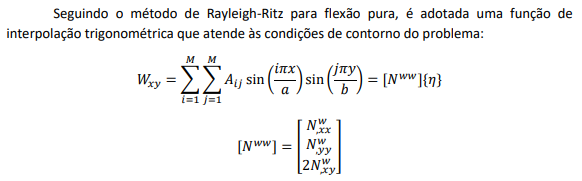

In [208]:
linha1 = np.concatenate((A, B), axis=1)
linha2 = np.concatenate((B, D), axis=1)
ABD = np.concatenate((linha1, linha2), axis=0)

ABD1 = sp.Matrix(ABD)
ABD1

Matrix([
[    121307.358264548,      20498.7294132564,  -6.3664629124105e-12,                0,                     0,                0],
[    20498.7294132564,      121307.358264548, -5.45696821063757e-12,                0, -1.81898940354586e-12,                0],
[-6.3664629124105e-12, -5.45696821063757e-12,      50404.3144256457,                0,                     0,                0],
[                   0,                     0,                     0, 22345.0398218281,       4746.3340741931, 2229.16560867387],
[                   0, -1.81898940354586e-12,                     0,  4746.3340741931,      19372.8190102629, 2229.16560867388],
[                   0,                     0,                     0, 2229.16560867387,      2229.16560867388, 10146.2460004835]])

In [209]:
# Definir variáveis simbólicas
#x = sp.symbols('x')
#y = sp.symbols('y')

# Inicializando o campo de deslocamento w
#w = np.zeros((M, M))
#Nu = []

#cont = 0
#for i in range(1, M+1):
#    for j in range(1, M+1):
        # Definir a expressão simbólica para w_ij
#        u_ij = x**i*y**j*(x-a)*(y-b)
#        Nu.append(u_ij)
#        cont += 1

# Verificando os valores de Nu
#Nu = sp.Matrix(Nu)
#Nu

In [210]:
# Definir variáveis simbólicas
x = sp.symbols('x')
y = sp.symbols('y')

# Inicializando o campo de deslocamento w
w = np.zeros((M, M))
Nw = []

cont = 0
for i in range(1, M+1):
    for j in range(1, M+1):
        # Definir a expressão simbólica para w_ij
        w_ij = sp.sin((i * sp.pi * x) / a) * sp.sin((j * sp.pi * y) / b)
        Nw.append(w_ij)
        cont += 1

# Verificando os valores de Nw
Nw = sp.Matrix(Nw)
Nw

Matrix([
[    sin(pi*x/40)*sin(pi*y/80)],
[    sin(pi*x/40)*sin(pi*y/40)],
[  sin(pi*x/40)*sin(3*pi*y/80)],
[    sin(pi*x/20)*sin(pi*y/80)],
[    sin(pi*x/20)*sin(pi*y/40)],
[  sin(pi*x/20)*sin(3*pi*y/80)],
[  sin(3*pi*x/40)*sin(pi*y/80)],
[  sin(3*pi*x/40)*sin(pi*y/40)],
[sin(3*pi*x/40)*sin(3*pi*y/80)]])

In [211]:
# Derivadas de w em relação a x e y
Nwxx = [sp.diff(w_ij, x, 2) for w_ij in Nw]  # Segunda derivada de w em relação a x
Nwyy = [sp.diff(w_ij, y, 2) for w_ij in Nw]  # Segunda derivada de w em relação a y
Nwxy = [sp.diff(sp.diff(w_ij, x), y) for w_ij in Nw]  # Derivada mista de w em relação a x e y

Nwx = [sp.diff(w_ij, x, 1) for w_ij in Nw]  # Segunda derivada de w em relação a x
Nwy = [sp.diff(w_ij, y, 1) for w_ij in Nw]  # Segunda derivada de w em relação a y
Nwyx = [sp.diff(sp.diff(w_ij, y), x) for w_ij in Nw]  # Derivada mista de w em relação a y e x

# Derivadas de primeiro ordem
Nwx = [sp.diff(w_ij, x) for w_ij in Nw]  # Derivada de w em relação a x
Nwy = [sp.diff(w_ij, y) for w_ij in Nw]  # Derivada de w em relação a y

# Convertendo listas de derivadas dentro das matrizes sympy
Nwxx_matrix = sp.Matrix(Nwxx)  # Converting list to Matrix
Nwyy_matrix = sp.Matrix(Nwyy)  # Converting list to Matrix
Nwxy_matrix = sp.Matrix(Nwxy)  # Converting list to Matrix

Nwx_matrix = sp.Matrix(Nwx)  # Converting list to Matrix
Nwy_matrix = sp.Matrix(Nwy)  # Converting list to Matrix
Nwyx_matrix = sp.Matrix(Nwyx)  # Converting list to Matrix


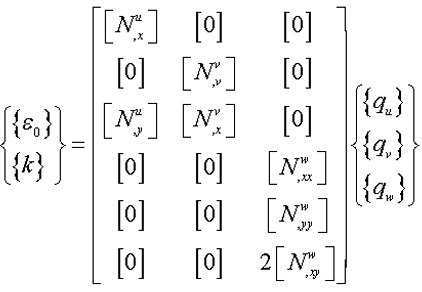

In [212]:
zeros = np.zeros((1, 9))
zeros= sp.Matrix(zeros)

# Matriz de derivadas (vetor de derivadas)
#Nwwuv1 = sp.Matrix([[Nux_matrix.T, zeros, zeros],[zeros, Nuy_matrix.T, zeros], [Nuy_matrix.T, Nux_matrix.T, zeros], [zeros, zeros, Nwxx_matrix.T], [zeros, zeros, Nwyy_matrix.T],[zeros, zeros, 2*Nwxy_matrix.T]])
Nwwuv1 = sp.Matrix([[Nwx_matrix.T, zeros, zeros],[zeros, Nwy_matrix.T, zeros], [Nwy_matrix.T, Nwx_matrix.T, zeros], [zeros, zeros, Nwxx_matrix.T], [zeros, zeros, Nwyy_matrix.T],[zeros, zeros, 2*Nwxy_matrix.T]])
Nwwuv1

Matrix([
[pi*sin(pi*y/80)*cos(pi*x/40)/40, pi*sin(pi*y/40)*cos(pi*x/40)/40,   pi*sin(3*pi*y/80)*cos(pi*x/40)/40, pi*sin(pi*y/80)*cos(pi*x/20)/20, pi*sin(pi*y/40)*cos(pi*x/20)/20,   pi*sin(3*pi*y/80)*cos(pi*x/20)/20, 3*pi*sin(pi*y/80)*cos(3*pi*x/40)/40, 3*pi*sin(pi*y/40)*cos(3*pi*x/40)/40, 3*pi*sin(3*pi*y/80)*cos(3*pi*x/40)/40,                               0,                               0,                                   0,                               0,                               0,                                   0,                                   0,                                   0,                                     0,                                     0,                                     0,                                         0,                                     0,                                     0,                                         0,                                         0,                                         0,                         

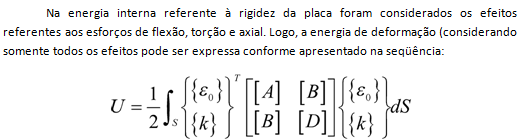

In [213]:
Kp_expr = sp.integrate(sp.integrate((Nwwuv1.T * ABD * Nwwuv1), (x, 0, a)), (y, 0, b))

Kp_expr

Matrix([
[3.18323145620525e-12 + pi*(-1.2732925824821e-10/pi + 504043.144256457*pi)/80 + pi*(-6.3664629124105e-11/pi + 2426147.16529096*pi)/40,                                                                                   -8.07793566946316e-28,                                                                                                      0,                                                                                                                                  0,                                                                                   2.26363125774596e-11,                                                                                                      0,                                                                                                       0,                                                                                                       0,                                                                                                  

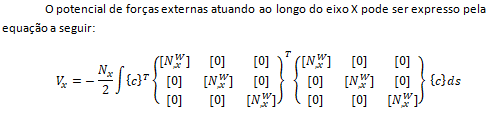

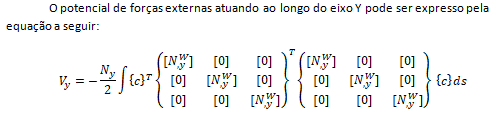

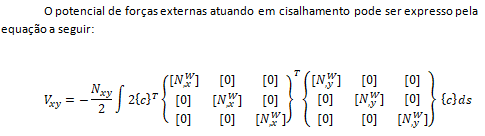

In [214]:
# Convertendo a lista para uma matriz do SymPy
Nwx_matrix = sp.Matrix(Nwx)
Nwy_matrix = sp.Matrix(Nwy)

Nnx = sp.Matrix([[Nwx_matrix.T, zeros, zeros], [zeros, Nwx_matrix.T, zeros],[zeros, zeros, Nwx_matrix.T]])
Nny = sp.Matrix([[Nwy_matrix.T, zeros, zeros], [zeros, Nwy_matrix.T, zeros],[zeros, zeros, Nwy_matrix.T]])

Kgx = Fx*(sp.integrate(sp.integrate(Nnx.T * Nnx, (x, 0, a)), (y, 0, b)))
Kgy = Fy*(sp.integrate(sp.integrate(Nny.T * Nny, (x, 0, a)), (y, 0, b)))


KG = Kgx + Kgy
KG
#Nnx

Matrix([
[-pi**2/8,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0],
[       0, -pi**2/2,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0],
[       0,        0, -9*pi**2/8,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0,        0,        0,          0],
[       0,        0,          0, -pi**2/8,        0,          0,        0,        0,          0,        0,        0,     

In [215]:
import numpy as np

# Definindo as matrizes A e B como arrays NumPy
A = np.array(Kp_expr , dtype=np.float64)
B = np.array(KG, dtype=np.float64)

# Verificando se as matrizes são invertíveis
if np.linalg.det(B) != 0:  # Verifica se a matriz B é invertível
    # Calculando os autovalores e autovetores para o problema generalizado A v = lambda B v
    autovalores, autovetores = np.linalg.eig(np.linalg.inv(B) @ A)
    
    # Exibindo os resultados
    print("Autovalores:", autovalores)
    print("Autovetores:\n", autovetores)
else:
    print("A matriz B não é invertível!")

Autovalores: [-4.41953413e+06 -5.59517756e+05 -5.35633747e+05 -3.01488556e+05
 -9.98058286e+04 -1.99870083e+06 -1.94189281e+06 -5.56037860e+05
 -5.78707470e+05 -1.17934438e+06 -8.97331269e+05 -3.22924616e+05
 -2.99109339e+05 -2.66152243e+05 -1.60481205e+05 -1.41090312e+05
 -2.24586086e+05 -1.51311892e+05 -1.41384695e+04 -1.00248708e+04
 -4.74745778e+04 -2.47923762e+03 -8.03808001e+03 -5.59589577e+02
 -3.53669291e+03 -8.84425563e+02 -6.35657936e+02]
Autovetores:
 [[ 2.95348724e-04 -9.18832377e-01  9.55523588e-01 -3.93802758e-01
  -5.04803632e-02  2.12201621e-18 -6.50477381e-19 -4.81401857e-14
  -7.60411160e-16 -1.33350765e-31  1.57444533e-31  1.29209398e-16
  -1.14110229e-16  3.63102115e-18  2.84911829e-18 -2.85912332e-17
  -4.74502015e-31 -4.05533655e-31  5.78169708e-21  9.82442562e-21
  -1.17905434e-34 -1.56955540e-19  2.02748195e-36  5.57529745e-21
  -7.59203375e-36 -4.25124333e-36 -4.38319072e-36]
 [-1.60099136e-32 -1.05546553e-32  1.77248163e-32  3.02619237e-31
  -3.05676518e-30 -4

In [216]:
# Carga crítica de flambagem (vetor diagonal do autovalor Ds)
Ny_cr = autovalores

# Calculando o valor mínimo absoluto da diagonal
Val = np.min(np.abs(Ny_cr))  # Valor absoluto mínimo
ind = np.argmin(np.abs(Ny_cr))  # Índice do valor absoluto mínimo

# Exibindo os resultados
print(f"Valor mínimo absoluto: {Val}")
print(f"Índice do valor mínimo absoluto: {ind}")

Valor mínimo absoluto: 559.5895766136391
Índice do valor mínimo absoluto: 23


In [217]:
Nw1 = sp.Matrix([[Nw.T, Nw.T, Nw.T]])
Nw1

Matrix([[sin(pi*x/40)*sin(pi*y/80), sin(pi*x/40)*sin(pi*y/40), sin(pi*x/40)*sin(3*pi*y/80), sin(pi*x/20)*sin(pi*y/80), sin(pi*x/20)*sin(pi*y/40), sin(pi*x/20)*sin(3*pi*y/80), sin(3*pi*x/40)*sin(pi*y/80), sin(3*pi*x/40)*sin(pi*y/40), sin(3*pi*x/40)*sin(3*pi*y/80), sin(pi*x/40)*sin(pi*y/80), sin(pi*x/40)*sin(pi*y/40), sin(pi*x/40)*sin(3*pi*y/80), sin(pi*x/20)*sin(pi*y/80), sin(pi*x/20)*sin(pi*y/40), sin(pi*x/20)*sin(3*pi*y/80), sin(3*pi*x/40)*sin(pi*y/80), sin(3*pi*x/40)*sin(pi*y/40), sin(3*pi*x/40)*sin(3*pi*y/80), sin(pi*x/40)*sin(pi*y/80), sin(pi*x/40)*sin(pi*y/40), sin(pi*x/40)*sin(3*pi*y/80), sin(pi*x/20)*sin(pi*y/80), sin(pi*x/20)*sin(pi*y/40), sin(pi*x/20)*sin(3*pi*y/80), sin(3*pi*x/40)*sin(pi*y/80), sin(3*pi*x/40)*sin(pi*y/40), sin(3*pi*x/40)*sin(3*pi*y/80)]])

In [218]:
Nw1 = sp.Matrix([[Nw.T, Nw.T, Nw.T]])

Mode = ind  # O modo de vibração

i = ind

displacement_field = -Nw1 @ autovetores[:, i]  # Multiplicação de matrizes/vetores  [:, i]

# Gerar a grade de x e y para a superfície
x = np.linspace(0, a, a)  # criando 100 pontos entre 0 e a 80 
y = np.linspace(0, b, b)  # criando 100 pontos entre 0 e b 40
X, Y = np.meshgrid(x, y)  # Criar uma grade para o gráfico

In [219]:
if displacement_field.size != X.size:
    displacement_field = np.resize(displacement_field, X.size)


Z = displacement_field.reshape(X.shape)

In [220]:
x = np.arange(0, a, 1)  # x variando de 0 até a
y = np.arange(0, b, 1)  # y variando de 0 até b

# Criando uma grade de coordenadas (x, y) usando meshgrid
X, Y = np.meshgrid(x, y)

# Substituindo na expressão fornecida para Z
Z_new = np.zeros((b, a))

if Fx==0 and Fy!=0:
    for i in range(b):
        for j in range(a):
            Z_new[i,j]=np.array(Z[i,j].evalf(subs={"x":i,"y":j}))
else:
    for i in range(b):
        for j in range(a):
            Z_new[i,j]=np.array(Z[i,j].evalf(subs={"y":i,"x":j}))



<Figure size 640x480 with 0 Axes>

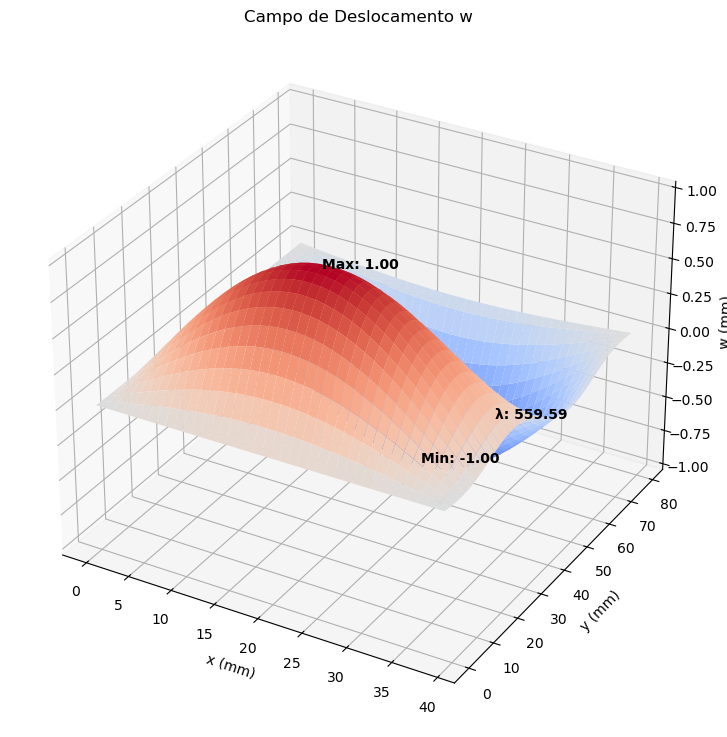

In [221]:
import numpy as np
import matplotlib.pyplot as plt

# Criar o gráfico 3D
fig = plt.figure()
fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111, projection='3d')

# Plotar a superfície
ax.plot_surface(X, Y, Z_new, cmap='coolwarm')

# Calcular os valores máximo e mínimo de Z_new
Z_max = np.max(Z_new)
Z_min = np.min(Z_new)

# Obter as coordenadas para o valor máximo e mínimo
max_coord = np.unravel_index(np.argmax(Z_new), Z_new.shape)
min_coord = np.unravel_index(np.argmin(Z_new), Z_new.shape)

# Adicionar texto para o maior valor
ax.text(X[max_coord], Y[max_coord], Z_max, f'Max: {Z_max:.2f}', color='black', fontsize=10, weight='bold')

# Adicionar texto para o menor valor
ax.text(X[min_coord], Y[min_coord], Z_min, f'Min: {Z_min:.2f}', color='black', fontsize=10, weight='bold')

# Adicionar texto para o eigenvalue
ax.text(X[35, 35], Y[35, 35], Z_new[0, 0], f'λ: {Val:.2f}', color='black', fontsize=10, weight='bold')

# Adicionar rótulos aos eixos e título
ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('w (mm)')
ax.set_title('Campo de Deslocamento w')

# Exibir o gráfico
plt.show()

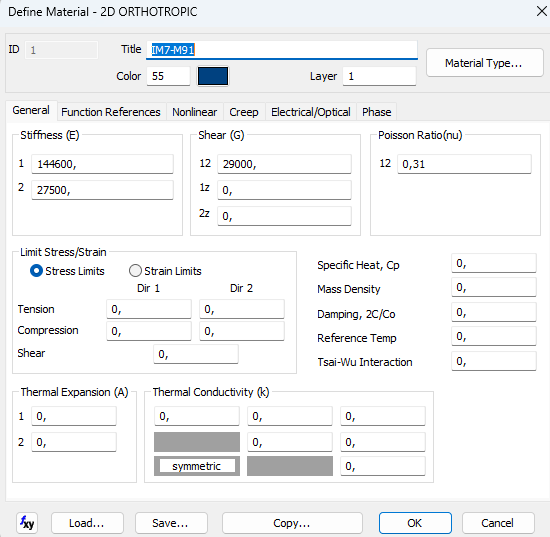

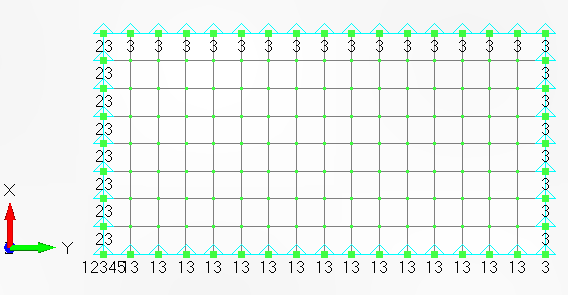

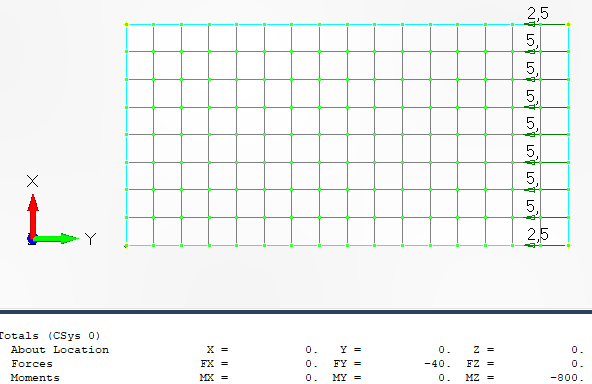

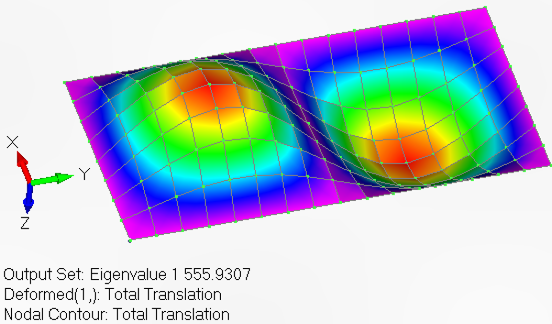